<a href="https://colab.research.google.com/github/exson6969/PCOS_App/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [2]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from catboost import CatBoostClassifier

In [4]:
pcos_data = pd.read_csv("/content/drive/MyDrive/PCOS/PCOS_data.csv")
pcos_data = pcos_data.set_index('Sl. No')
pcos_data =pcos_data.drop(['Unnamed: 44'], axis=1)
pcos_data

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,1,0,28,44.6,152.000,19.3,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
2,2,0,36,65.0,161.500,24.9,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
3,3,1,33,68.8,165.000,25.3,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
4,4,0,37,65.0,148.000,29.7,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
5,5,0,25,52.0,161.000,20.1,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,537,0,35,50.0,164.592,18.5,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
538,538,0,30,63.2,158.000,25.3,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
539,539,0,36,54.0,152.000,23.4,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3


In [5]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 1 to 541
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1   PCOS (Y/N)              541 non-null    int64  
 2    Age (yrs)              541 non-null    int64  
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    int64  
 7   Pulse rate(bpm)         541 non-null    int64  
 8   RR (breaths/min)        541 non-null    int64  
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    int64  
 11  Cycle length(days)      541 non-null    int64  
 12  Marraige Status (Yrs)   540 non-null    float64
 13  Pregnant(Y/N)           541 non-null    int64  
 14  No. of abortions        541 non-null    in

In [6]:
pcos_data["AMH(ng/mL)"] = pd.to_numeric(pcos_data["AMH(ng/mL)"], errors='coerce')
pcos_data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos_data["II    beta-HCG(mIU/mL)"], errors='coerce')
pcos_data

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,1,0,28,44.6,152.000,19.3,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
2,2,0,36,65.0,161.500,24.9,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
3,3,1,33,68.8,165.000,25.3,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
4,4,0,37,65.0,148.000,29.7,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
5,5,0,25,52.0,161.000,20.1,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,537,0,35,50.0,164.592,18.5,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
538,538,0,30,63.2,158.000,25.3,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
539,539,0,36,54.0,152.000,23.4,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3


In [7]:
 #Filling missing values with the median value of the features.

pcos_data['Marraige Status (Yrs)'].fillna(pcos_data['Marraige Status (Yrs)'].median(),inplace=True)
pcos_data['II    beta-HCG(mIU/mL)'].fillna(pcos_data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
pcos_data['AMH(ng/mL)'].fillna(pcos_data['AMH(ng/mL)'].median(),inplace=True)
pcos_data['Fast food (Y/N)'].fillna(pcos_data['Fast food (Y/N)'].median(),inplace=True)

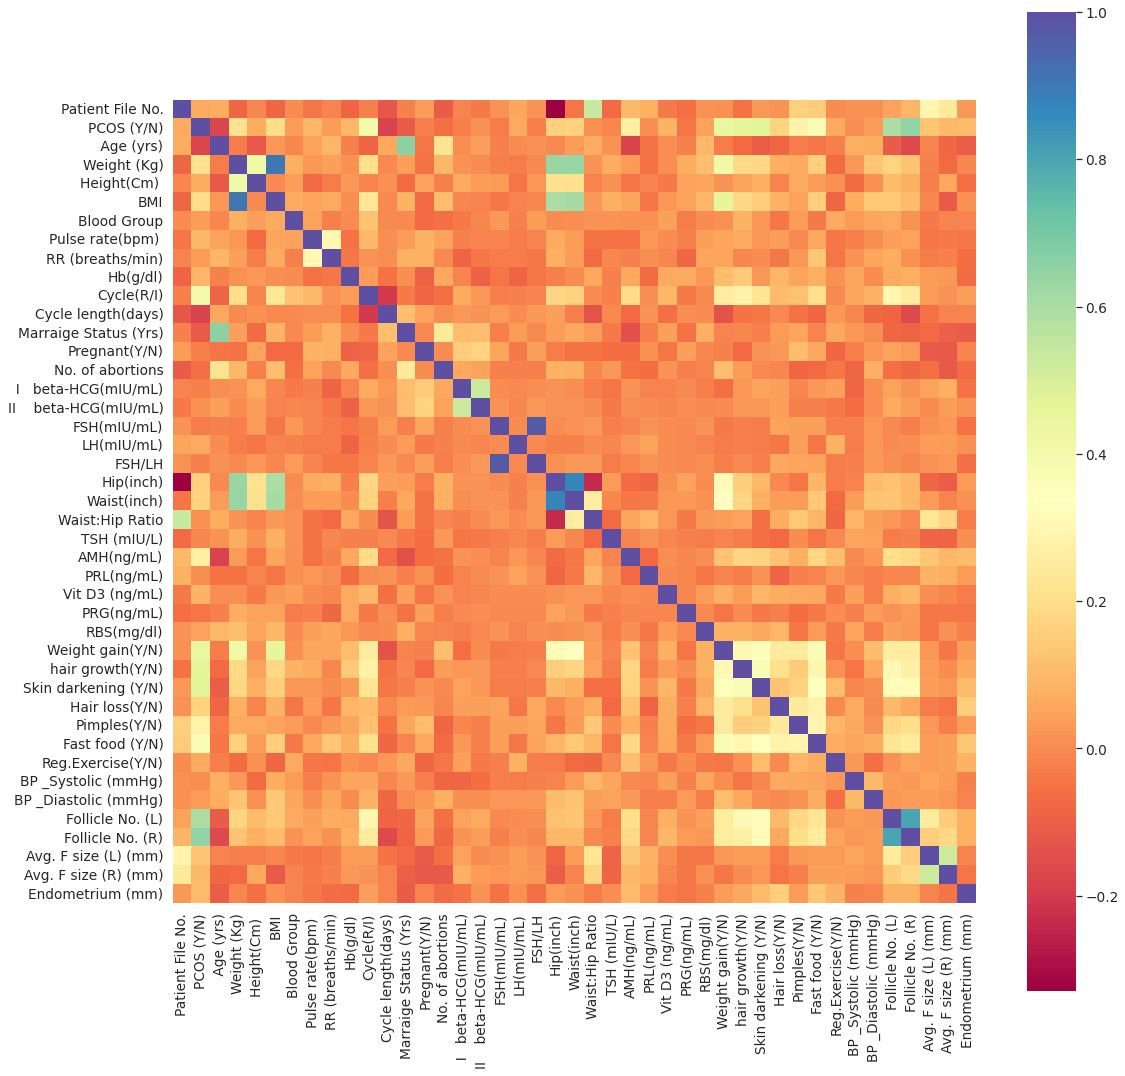

In [10]:
#Creating Correlation matrix 
corrmat = pcos_data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Spectral", square=True);

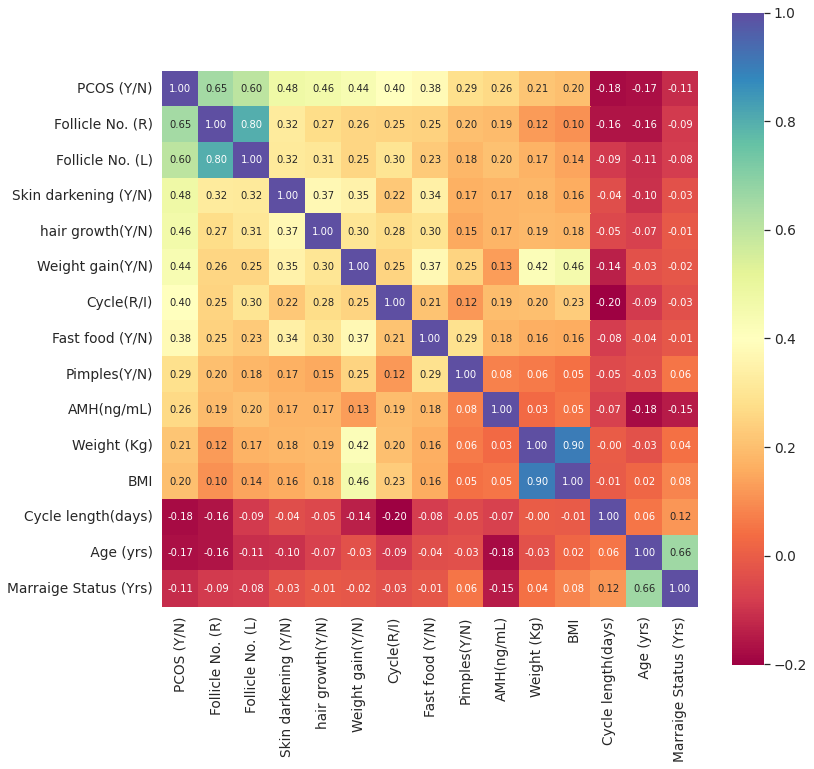

In [11]:
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(pcos_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Spectral", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
pcos_data.describe()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
X= pcos_data.drop(labels = ["PCOS (Y/N)"],axis = 1)
y= pcos_data['PCOS (Y/N)']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.4) 


In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

cat_clf = CatBoostClassifier()
cat_clf.fit(X_test,y_test, cat_features=categorical_features_indices)
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
print(f"Accuracy: % {acc_cat_clf_test}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Learning rate set to 0.005365
0:	learn: 0.6898441	total: 3.82ms	remaining: 3.82s
1:	learn: 0.6866566	total: 17.5ms	remaining: 8.73s
2:	learn: 0.6834015	total: 28.6ms	remaining: 9.52s
3:	learn: 0.6780396	total: 55.6ms	remaining: 13.8s
4:	learn: 0.6744458	total: 79.2ms	remaining: 15.8s
5:	learn: 0.6704140	total: 101ms	remaining: 16.7s
6:	learn: 0.6652202	total: 122ms	remaining: 17.4s
7:	learn: 0.6608415	total: 147ms	remaining: 18.2s
8:	learn: 0.6570257	total: 174ms	remaining: 19.2s
9:	learn: 0.6528520	total: 201ms	remaining: 19.9s
10:	learn: 0.6487512	total: 227ms	remaining: 20.4s
11:	learn: 0.6452594	total: 253ms	remaining: 20.9s
12:	learn: 0.6413048	total: 276ms	remaining: 20.9s
13:	learn: 0.6372111	total: 292ms	remaining: 20.6s
14:	learn: 0.6332449	total: 304ms	remaining: 19.9s
15:	learn: 0.6303017	total: 317ms	remaining: 19.5s
16:	learn: 0.6271496	total: 329ms	remaining: 19s
17:	learn: 0.6229945	total: 344ms	remaining: 18.8s
18:	learn: 0.6193816	total: 356ms	remaining: 18.4s
19:	lear